In [1]:
import pandas as pd

In [35]:
df = pd.read_csv('data/serenelli2017/s17_seis.csv')
df['name'] = 'KIC' + df['KIC'].astype(str)
df.head()

,KIC,numax,enumax,Dnu,eDnu,Length,HBR,name
0,1435467,1382.311,19.038,70.558,0.087,938.1,1.662,KIC1435467
1,2010607,674.919,146.523,42.479,2.185,28.9,1.547,KIC2010607
2,2309595,643.208,11.226,39.029,0.721,28.9,1.767,KIC2309595
3,2450729,1053.105,114.904,61.910,2.539,28.9,1.470,KIC2450729
4,2837475,1629.761,18.396,75.720,0.129,1029.4,1.767,KIC2837475


In [36]:
duplicates = df[df.duplicated('numax', False)].copy()
duplicates

,KIC,numax,enumax,Dnu,eDnu,Length,HBR,name
23,3632418,690.176,32.749,39.276,0.309,1018.8,2.398,KIC3632418
59,4574610,690.176,32.749,39.276,0.309,26.0,1.925,KIC4574610
71,4914923,690.176,32.749,39.276,0.309,962.7,1.546,KIC4914923
122,6442183,690.176,32.749,39.276,0.309,955.9,2.765,KIC6442183
158,7341231,690.176,32.749,39.276,0.309,1038.8,5.927,KIC7341231
174,7747078,690.176,32.749,39.276,0.309,1045.7,2.201,KIC7747078
368,11070918,690.176,32.749,39.276,0.309,90.1,1.409,KIC11070918
414,12366681,690.176,32.749,39.276,0.309,87.8,1.700,KIC12366681


In [37]:
inputs = pd.read_csv('data/stellr/inputs_DR14_ASPC.csv')
inputs.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.60000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
1,KIC7799349,4976.7870,82.60566,4.421854,0.138701,33.299,0.322,0.284619,0.029484,3.670984,0.007718,0,0,0
2,KIC5822889,5184.0103,94.43386,12.830989,0.707319,19.708,0.127,-0.026246,0.039186,3.401706,0.012167,0,0,0
3,KIC12069569,6062.4185,168.10576,7.144911,0.291244,44.687,2.162,-0.084244,0.066659,3.825712,0.060999,0,0,0
4,KIC6947945,5334.4380,103.46670,3.806103,0.153818,43.660,1.416,-0.041512,0.043107,3.794063,0.011004,0,0,0


In [38]:
inputs[inputs['name'].isin(duplicates['name'])]

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
12,KIC4914923,5782.4487,120.815520,2.058336,0.084188,39.276,0.309,0.125598,0.071261,3.786906,0.021518,0,0,0
152,KIC4574610,5943.3813,149.969760,10.827898,0.406745,39.276,0.309,-0.149043,0.064980,3.792867,0.021736,0,0,0
159,KIC7341231,5295.4473,108.187935,5.131235,0.159214,39.276,0.309,-2.009766,0.113441,3.767802,0.021497,1,0,0
229,KIC6442183,5575.4220,120.476850,2.466006,0.075760,39.276,0.309,-0.103785,0.066987,3.778989,0.021551,0,0,0
271,KIC12366681,6417.0880,144.960240,14.801633,0.522609,39.276,0.309,0.109468,0.085863,3.809519,0.021599,0,0,0
292,KIC7747078,5841.3447,141.405620,4.438065,0.153293,39.276,0.309,-0.242473,0.064382,3.789107,0.021681,0,0,0
331,KIC3632418,6106.7866,140.943700,4.786853,0.154229,39.276,0.309,-0.140646,0.078294,3.798757,0.021623,0,0,0


In [39]:
s17_mass = pd.read_csv('data/serenelli2017/s17_SDSS.csv')
s17_mass.head()

,KIC,Teff,eTeff,[M/H],e[M/H],Radius,+eRad,-eRad,syRad,Mass,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,1435467,6433.0,86.0,-0.028,0.099,1.693,0.015,-0.016,0.010,1.344,...,-0.006,0.002,0.27770,0.002376,-0.002391,0.001505,2.605,0.302,-0.293,0.215
1,2010607,6361.0,71.0,-0.070,0.100,2.410,0.100,-0.090,0.035,1.402,...,-0.027,0.003,0.09973,0.009867,-0.009399,0.001393,2.755,0.296,-0.301,0.184
2,2309595,5238.0,65.0,-0.095,0.101,2.423,0.076,-0.073,0.022,1.167,...,-0.008,0.002,0.08183,0.002543,-0.002494,0.000710,5.460,1.351,-1.023,0.422
3,2450729,6029.0,59.0,-0.212,0.100,1.758,0.059,-0.056,0.023,1.112,...,-0.021,0.006,0.20430,0.015940,-0.014980,0.002889,6.034,0.804,-0.718,0.550
4,2837475,6688.0,57.0,-0.015,0.100,1.710,0.022,-0.043,0.039,1.665,...,-0.011,0.006,0.33190,0.002563,-0.002835,0.006216,1.131,0.197,-0.181,0.221


In [42]:
prior = pd.read_csv('/Users/ajl573/Source/PBjam/pbjam/data/prior_data.csv')
prior.head()

,ID,numax,dnu,teff,bp_rp,eps,d02,alpha,env_height,env_width,mode_width
0,KIC10000108,1.733309,0.765528,3.700790,1.245281,1.087071,-0.094080,-1.833791,1.158124,0.837357,-1.005032
1,KIC10000151,2.398048,1.263640,3.703635,1.211299,1.409763,0.358209,-2.751492,0.835940,1.352872,-0.819796
2,KIC10000162,2.142314,1.070382,3.691170,1.290404,1.279102,0.177751,-2.112427,0.914818,1.129037,-0.929398
3,KIC10000198,2.096495,1.038155,3.705094,1.220201,1.227100,0.167187,-2.042296,1.184560,1.129467,-0.818954
4,KIC10000207,1.977422,0.946299,3.673942,1.249536,1.195084,0.068176,-1.957096,1.230765,1.076918,-0.869511


In [47]:
comp = df.merge(prior, left_on='name', right_on='ID', suffixes=('_S17', '_PBJ'))
comp.head()

,KIC,numax_S17,enumax,Dnu,eDnu,Length,HBR,name,ID,numax_PBJ,dnu,teff,bp_rp,eps,d02,alpha,env_height,env_width,mode_width
0,2991448,1111.248,18.148,61.732,0.899,92.6,1.609,KIC2991448,KIC2991448,3.055235,1.790047,3.766115,0.873957,1.394765,0.719693,-3.481696,0.736350,1.978549,-0.117403
1,3115178,428.866,7.731,28.414,0.728,29.4,3.308,KIC3115178,KIC3115178,2.636404,1.449874,3.702947,1.186785,1.447252,0.489108,-2.366179,1.075930,1.648455,-0.427015
2,3329196,435.093,31.154,29.604,1.193,31.1,7.560,KIC3329196,KIC3329196,2.638948,1.474612,3.712734,1.108702,1.420990,0.516939,-2.436423,1.422755,1.667456,-0.400539
3,3429205,371.041,4.536,24.296,0.098,683.0,3.970,KIC3429205,KIC3429205,2.575977,1.387559,3.708931,1.121305,1.378122,0.380555,-2.277470,1.371735,1.570713,-0.438162
4,3437637,834.621,45.394,48.084,1.996,24.9,1.496,KIC3437637,KIC3437637,2.915562,1.684162,3.739018,0.960975,1.456341,0.691718,-2.486520,0.653108,1.998493,-0.239163


<AxesSubplot:xlabel='numax_PBJ', ylabel='numax_S17'>

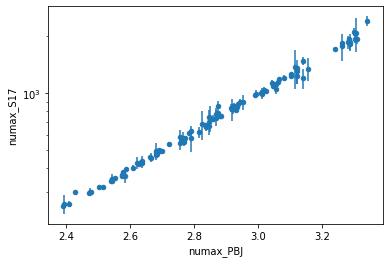

In [50]:
comp.plot(x='numax_PBJ', y='numax_S17', yerr='enumax', kind='scatter', logy=True)

In [53]:
comp.loc[comp['numax_PBJ'] < 2.44]

,KIC,numax_S17,enumax,Dnu,eDnu,Length,HBR,name,ID,numax_PBJ,dnu,teff,bp_rp,eps,d02,alpha,env_height,env_width,mode_width
6,3630240,253.379,6.169,18.327,0.310,28.5,3.109,KIC3630240,KIC3630240,2.391565,1.261548,3.711892,1.061467,1.376263,0.335598,-2.259854,0.999748,1.433909,-0.681930
13,4347652,259.952,30.482,17.352,1.004,28.9,3.118,KIC4347652,KIC4347652,2.395758,1.245848,3.695919,1.166432,1.420584,0.310086,-2.568114,1.247189,1.387035,-0.844687
34,5822889,300.250,7.401,19.708,0.127,317.2,1.636,KIC5822889,KIC5822889,2.428414,1.294412,3.717671,1.121519,1.403674,0.310437,-2.611696,0.693486,1.347093,-0.695743
68,9150095,260.118,8.461,18.319,0.445,24.9,4.177,KIC9150095,KIC9150095,2.410561,1.269908,3.701395,1.187461,1.393442,0.354772,-2.635111,1.335463,1.388210,-0.740461


<AxesSubplot:xlabel='dnu', ylabel='Dnu'>

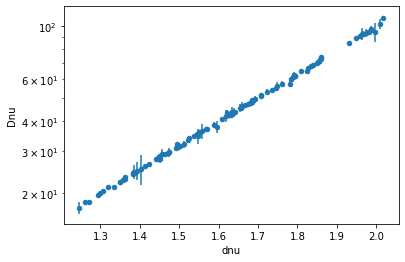

In [55]:
comp.plot(x='dnu', y='Dnu', yerr='eDnu', kind='scatter', logy=True)